# Exploration of Investment Scenarios

This notebook visualizes the differences in outcome when I move money around between savings and investment accounts in the short term.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from functions import *

Compound interest formula:

$$
A = P\left(1+\frac{r}{n}\right)^{nt}
$$

where:

* $A$ = the future value of the investment/loan, including interest
* $P$ = the principal investment amount (the initial deposit or loan amount)
* $r$ = the annual interest rate (decimal)
* $n$ = the number of times that interest is compounded per year
* $t$ = the number of years the money is invested or borrowed for

In [2]:
def compound_interest(P, r, n, t):
    """
    Calculate compound interest.
    
    Paramaters
    ----------
    P : float
        principal investment amount
        
    r : float
        the annual interest rate (as a fraction)
    
    n : float
        the number of times that interest is compounded per year
    
    t : float
        the number of years the money is invested or borrowed for
        
    Returns
    -------
    A : float
        the future value of the investment/loan, including interest
    """
    A = P * (1 + (r/n))**(n*t)
    return A

My savings account has a guaranteed annual return of 2.29%, and diversified investments have an average annual return of around 7% (in the long term - for example see [this article](https://www.thesimpledollar.com/where-does-7-come-from-when-it-comes-to-long-term-stock-returns/)), though of course with significant risk in the short term:

In [3]:
r_saving = 0.0229
r_invest = 0.07

Let's not divulge any specifics, and say that I have $1.00 in my savings at the moment, that I'll be investing for 2 years, and that interest is compounded each month.

In [4]:
P_tot = 1
t_years = 2
n = 12

What if we split it 75:25 (savings:investments)?

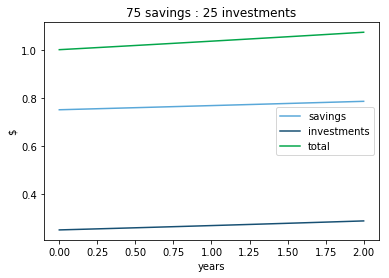

final total = $1.07


In [5]:
R_1 = 0.75

# assign the principal in each account
P_saving_1 = P_tot * R_1
P_invest_1 = P_tot - P_saving_1

# create the time array
t = np.linspace(0,t_years,n*t_years)

# calculate the projected value
A_saving_1 = compound_interest(P_saving_1, r_saving, n, t)
A_invest_1 = compound_interest(P_invest_1, r_invest, n, t)
A_total_1 = A_saving_1 + A_invest_1

# plot
c_saving = '#59a8d9'
c_invest = '#175073'
c_total = '#03a64a'
c_bg = '#222222'
c_ax = '#eeeeee'

fig, ax = plt.subplots()

ax.plot(t, A_saving_1, c=c_saving, label='savings')
ax.plot(t, A_invest_1, c=c_invest, label='investments')
ax.plot(t, A_total_1, c=c_total, label='total')

ax.set_title('75 savings : 25 investments')
ax.set_xlabel('years')
ax.set_ylabel('$')
ax.legend()

plt.show(fig)

# then print
print('final total = ${:.2f}'.format(A_total_1[-1]))

And 50:50?

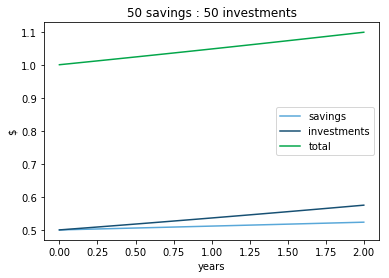

final total = $1.10


In [6]:
R_2 = 0.50

# assign the principal in each account
P_saving_2 = P_tot * R_2
P_invest_2 = P_tot - P_saving_2

# calculate the projected value
A_saving_2 = compound_interest(P_saving_2, r_saving, n, t)
A_invest_2 = compound_interest(P_invest_2, r_invest, n, t)
A_total_2 = A_saving_2 + A_invest_2

# plot

fig, ax = plt.subplots()

ax.plot(t, A_saving_2, c=c_saving, label='savings')
ax.plot(t, A_invest_2, c=c_invest, label='investments')
ax.plot(t, A_total_2, c=c_total, label='total')

ax.set_title('50 savings : 50 investments')
ax.set_xlabel('years')
ax.set_ylabel('$')
ax.legend()

plt.show(fig)

# then print
print('final total = ${:.2f}'.format(A_total_2[-1]))

Compare the two:

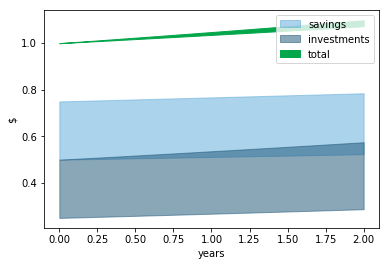

In [7]:
fig, ax = plt.subplots()

ax.fill_between(t, A_saving_1, A_saving_2, color=c_saving, label='savings', alpha=0.5)
ax.fill_between(t, A_invest_1, A_invest_2, color=c_invest, label='investments', alpha=0.5)
ax.fill_between(t, A_total_1, A_total_2, color=c_total, label='total')

ax.set_xlabel('years')
ax.set_ylabel('$')
ax.legend()

plt.show(fig)